## Real Estate Machine Learning Model - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,501.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.286629,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.705182,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.887000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

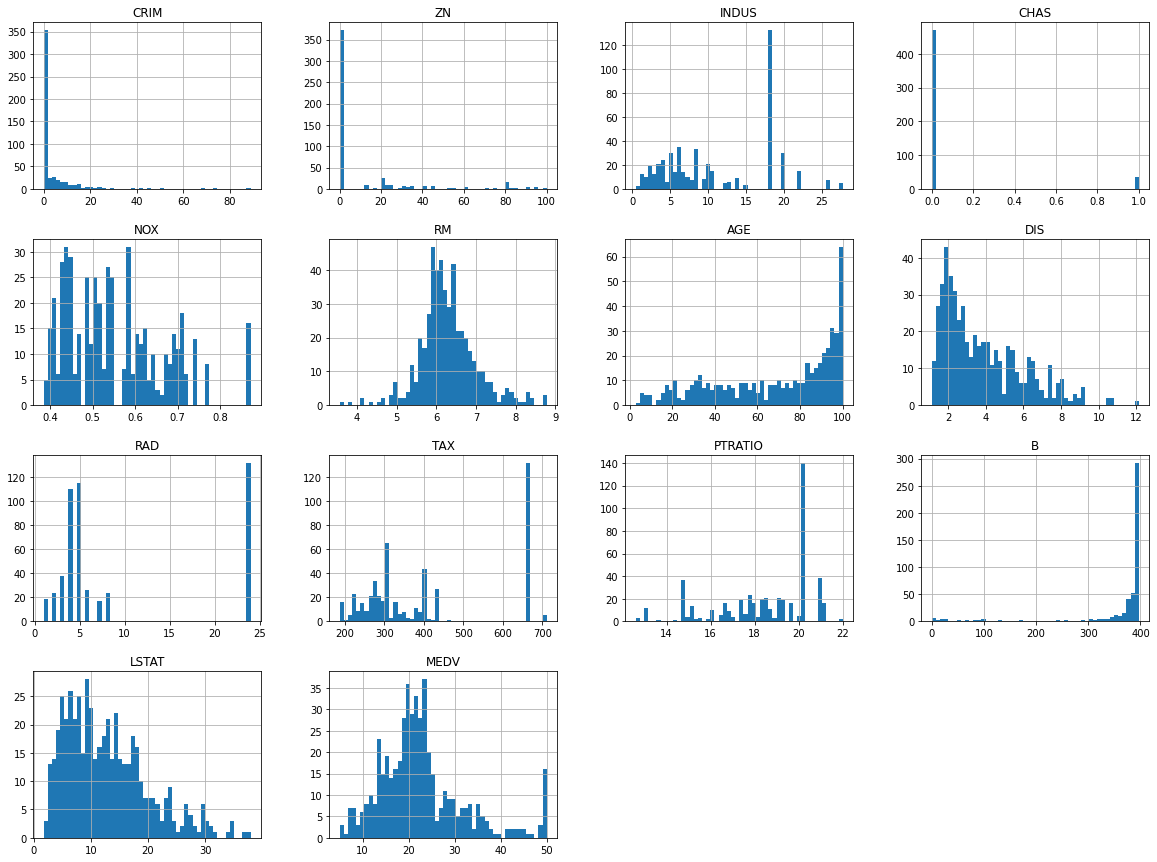

In [8]:
#FOR PLOTTING HISTOGRAM
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

# Train Test Splitting

In [9]:
'''#For learing for purpose
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size=int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]
    '''
    

'#For learing for purpose\nimport numpy as np\n\ndef split_train_test(data,test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    test_set_size=int(len(data)* test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices] , data.iloc[test_indices]\n    '

In [10]:
#train_set,test_set = split_train_test(housing,0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\n Rows in test set :{len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing , test_size=0.2 , random_state=42)


In [13]:
print(f"Rows in train set: {len(train_set)}\n Rows in test set :{len(test_set)}\n")

Rows in train set: 404
 Rows in test set :101



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 176 to 356
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [16]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

In [20]:
housing = strat_train_set.copy()

# LOOKING FOR CO-RELATIONS

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660455
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

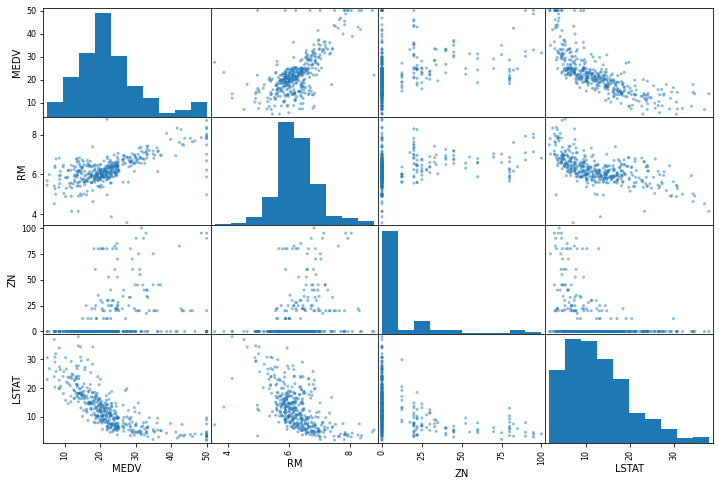

In [22]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

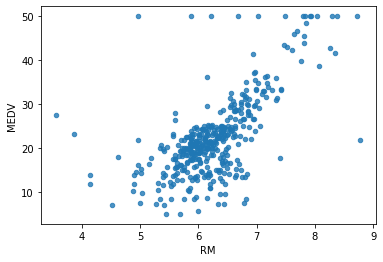

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# TRYING OUT ATTRIBUTE COMBINATION

In [24]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [25]:
housing["TAXRM"]


254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [27]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660455
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.508559
LSTAT     -0.739129
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

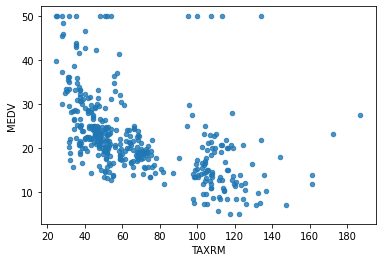

In [28]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [29]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_label=strat_train_set["MEDV"].copy()

# MISSING ATTRIBUTES

In [30]:
#to take care of missing attributes you have 3 options:
# 1. Get rid of missing data points
# 2. Get rid of whole attribute(column)
# 3. Set the value of some value(0,mean or median)

In [31]:
a= housing.dropna(subset=["RM"]) #option 1
a.shape
#note that  original hosuing dataframe will remain unchanged

(401, 13)

In [32]:
housing.drop("RM",axis=1).shape   #option 2
#note that there is no RM column and also note that original hosuing dataframe will remain unchanged

(404, 12)

In [33]:
#option 3
median=housing["RM"].median()  #compute median for option 3

In [34]:
housing["RM"].fillna(median)
#note that  original hosuing dataframe will remain unchanged

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
housing.shape

(404, 13)

In [36]:
housing.describe() # before we started filling missing attributes note RM values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.254244,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.690497,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875000,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.606000,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [37]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [39]:
X =  imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X,columns= housing.columns)

In [41]:
housing_tr.describe() #note RM values now it is 404

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.253730,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.687948,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.875750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.185000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Primarily , 3 types of objects:
1. Estimators - estimates some parameters based on dataset(Ex: Imputer) , it has a fit method and transform method ,
   Fit the dataset and calculates the internal parameters
   
2. Transformers - transform method takes input and returns output based o =n the learnings from fit(). It also has a convinient functio called fit_transform() which fits then transforms.

3. Predictors - LinearRegression model is an example of predictor , fit() and predict() are two common functions . It also gives socre() function which will evaluate the predictions.

# Feature Scailing

Primarily 2 types of scaling :
1. Min-max scaling(Normalization):
     (value - min) / (max-min)
   sklearn provides class named as MinMaxScaler for this feature
   
2. Standardization:
    (value - min ) / std
    sklearn provied a class called Standard Scaler for this.
    This is more recommended 



# Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())
                       ])


In [43]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [44]:
housing_num_tr.shape

(404, 13)

# Selecting The desired model for Real Estate Company

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model =  DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor()

In [46]:
some_data = housing.iloc[:5]

In [47]:
some_labels= housing_label.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)

In [49]:
model.predict(prepared_data)

array([20.643, 26.825, 12.835, 21.055, 21.859])

In [50]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# EVALUATING THE MODEL

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label,housing_predictions)
rmse = np.sqrt(mse)



In [52]:
mse

1.4708963341584165

# using better evaluation technique - Cross validation

In [53]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [54]:
rmse_scores

array([3.26910783, 2.55155289, 5.1445433 , 2.82121825, 2.75154235,
       2.41795549, 3.02687092, 2.93209671, 2.10467684, 4.41380961])

In [55]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [56]:
print_scores(rmse_scores)

Scores:  [3.26910783 2.55155289 5.1445433  2.82121825 2.75154235 2.41795549
 3.02687092 2.93209671 2.10467684 4.41380961]
Mean:  3.1433374191003614
Standard Deviation:  0.889123030761108


# saving the model

In [57]:
from joblib import dump,load
dump(model,'RealEstate.joblib')


['RealEstate.joblib']

# Testing The Model 

In [64]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction =  model.predict(X_test_prepared)
final_mse  =mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(Y_test))

[22.993 22.171 46.514 32.668 44.273 34.842 20.827 23.649 33.52  19.98
 19.176 29.668 22.145 32.999 20.479 18.623 13.103 21.368 28.104 19.55
 19.782 44.9   11.825 18.823 25.685 34.72  16.423 14.914  6.804 19.786
 23.428 23.311 18.075 15.1   21.106 19.673 22.466 17.112 45.205 18.053
 21.302 18.708 19.215 18.681 33.24   8.153 24.551 14.438 20.946 21.462
 46.33  24.497 14.896 21.413 19.51  47.44  33.652 19.234 35.326 10.757
 23.933 36.035 33.901 23.806 14.143 21.217 20.489 16.326 28.021 24.553
 23.154 32.195 19.318 32.15  10.025 20.079 41.46  19.809 19.18  15.598
 41.447  9.491 35.135 22.178 28.695 15.754 22.717 21.438 20.38  15.355
 26.599 10.542 32.55  12.838 25.608 20.091 33.335 13.893 20.841 20.987
 20.561] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 1

In [62]:
final_rmse

3.25387361387155

In [66]:
print(list(prepared_data[0]))

[-0.4424124764304073, 3.187167522220336, -1.1258155214657077, -0.2728884114549077, -1.420386050896487, -0.549748647016678, -1.741261301341014, 2.5628438625217, -0.9953477621244027, -0.5738779718172168, -0.9942820681044471, 0.43852973958060193, -0.49833679182837365]


# Using The Model

In [67]:
from joblib import dump,load
import numpy as np
model = load('RealEstate.joblib')

input=np.array([[-0.4424124764304073,3.187167522220336, -1.1258155214657077, -0.2728884114549077, -1.420386050896487, -0.549748647016678, -1.741261301341014, 2.5628438625217, -0.9953477621244027, -0.5738779718172168, -0.9942820681044471, 0.43852973958060193, -0.49833679182837365]])
model.predict(input)

array([20.643])